In [1]:
# Our classic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost

/home/jinruwu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install shap
import shap
# Run the following command. Needed for some visualizations.
shap.initjs();

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/9e/3f/247e0017d52eeef37c170d71357eb3a12a2c06718d2e184c9929b6f3d9ed/shap-0.43.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/ed/13/b66627125b35f2987bd9872cf028b5e1e1ffcbc8d1e182ac4e84eed3998f/numba-0.58.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/57/7d/ef28d5812f852b93bd2a583d00cdcde56833d31b645ae0eaa7e71eecfb4e/llvmlite-0.41.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/10/be/ae5bf4737cb79ba437879915791f6f26d92583c738d7d960ad94e5c36adf/numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86

In [24]:
y

array([6.3810e+03, 1.6130e+03, 7.2230e+03, 7.2900e+03, 7.4670e+03,
       8.1100e+02, 1.6028e+04, 2.5680e+03, 2.6251e+04, 3.1050e+03,
       9.9540e+03, 6.1170e+03, 2.2400e+03, 3.9048e+04, 9.3750e+03,
       6.2520e+03, 7.8020e+03, 1.4311e+04, 7.2780e+03, 1.6148e+04,
       2.9190e+03, 1.1105e+04, 6.7670e+03, 4.8980e+03, 3.7030e+03,
       1.4533e+04, 4.2080e+03, 5.6720e+03, 9.5190e+03, 7.2850e+03,
       7.4270e+03, 1.5667e+04, 1.9730e+03, 1.5199e+04, 9.1830e+03,
       3.1090e+03, 2.4100e+03, 8.1700e+03, 1.0266e+04, 2.6630e+03,
       7.1150e+03, 3.5520e+03, 3.6620e+03, 4.3860e+03, 2.2866e+04,
       6.0770e+03, 2.2100e+04, 3.5310e+03, 1.3000e+01, 2.0020e+03])

In [12]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# Load the data
X, y = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Fit our model
model_tree = xgboost.XGBRegressor(n_estimators=100, max_depth=2)
model_tree.fit(X_train, y_train)

# Predict
y_test_pred = model_tree.predict(X_test)

In [23]:
# The average house price (in $100.000)
print(f"The average house price in the train set is {y_train.mean():.3f}")


# Have a look at the mean squared error on the test set
mse = mean_squared_error(y_test, y_test_pred)
print(f"The Mean Squared Error on the test set is   {mse:.3f}")

The average house price in the train set is 2.067
The Mean Squared Error on the test set is   0.292


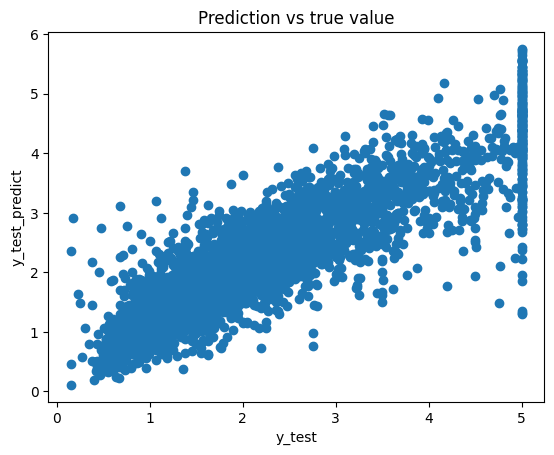

In [6]:
# Let's check our predictions on the test set visually
plt.scatter(y_test, y_test_pred)
plt.title("Prediction vs true value")
plt.xlabel("y_test"); plt.ylabel("y_test_predict");

In [25]:
feature_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8323,2.2031,27.0,4.412935,1.104478,1622.0,4.034826,33.95,-118.3


In [7]:
row_to_show = 24  # Select one instance to explain
feature_values = X_test.iloc[[row_to_show]]
prediction = model_tree.predict(feature_values)
print(f"{'The prediction for this instance:':<35}{prediction[0]:>7.3f}")

The prediction for this instance:    1.558


In [8]:
# Step 1: Create a SHAP Explainer
explainer = shap.Explainer(model_tree)

In [9]:
# Step 2: Calculate the SHAP values
# Using the explainer we just created
# and giving as input the feature values for our instance
shap_values_one = explainer(feature_values)

In [26]:
shap_values_one

.values =
array([[-0.57426316,  0.01985439, -0.09508029,  0.04936926,  0.00903852,
        -0.2642488 ,  0.41697693, -0.07067186]], dtype=float32)

.base_values =
array([2.06738], dtype=float32)

.data =
array([[ 2.20310000e+00,  2.70000000e+01,  4.41293532e+00,
         1.10447761e+00,  1.62200000e+03,  4.03482587e+00,
         3.39500000e+01, -1.18300000e+02]])

In [10]:
# Have a look at these values
print(f"{'Base value:':<35}{shap_values_one.base_values[0]:>7.3f}")
print(f"{'Sum of SHAP values:':<35}{shap_values_one.values.sum():>7.3f}")
print(f"{'The prediction for this instance:':<35}{prediction[0]:>7.3f}")

Base value:                          2.067
Sum of SHAP values:                 -0.509
The prediction for this instance:    1.558


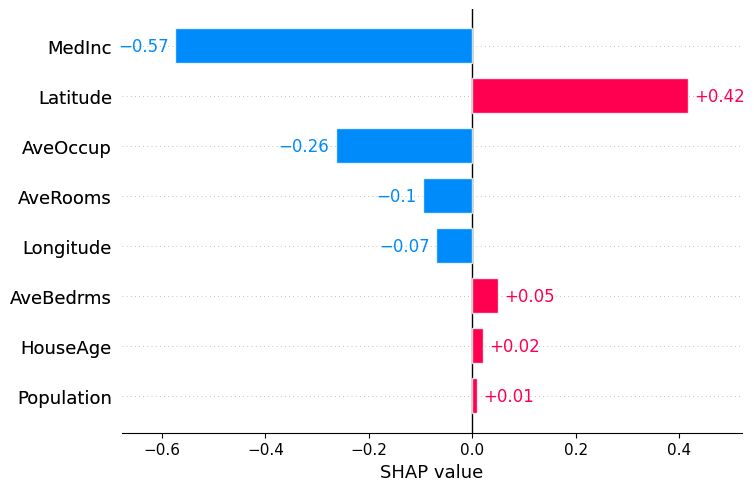

In [11]:
shap.plots.bar(shap_values_one[0])

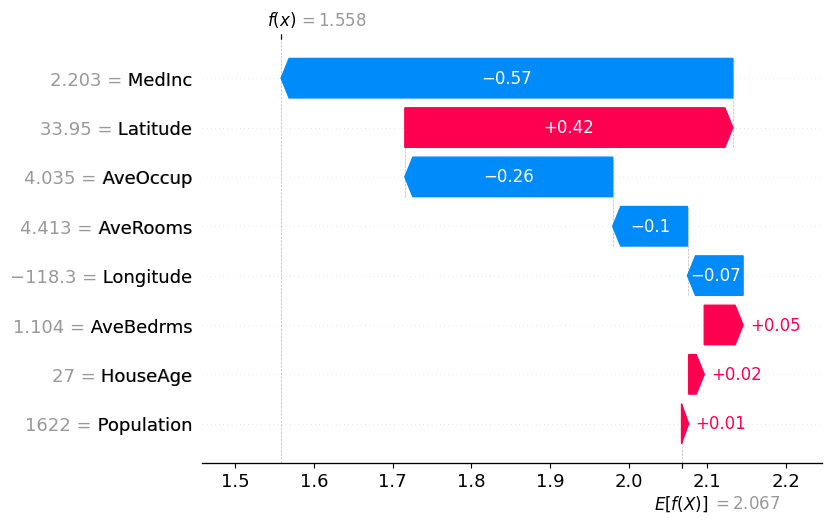

In [13]:
shap.plots.waterfall(shap_values_one[0])

In [14]:
shap.plots.force(shap_values_one[0])

In [15]:
shap_values = explainer(X_test)

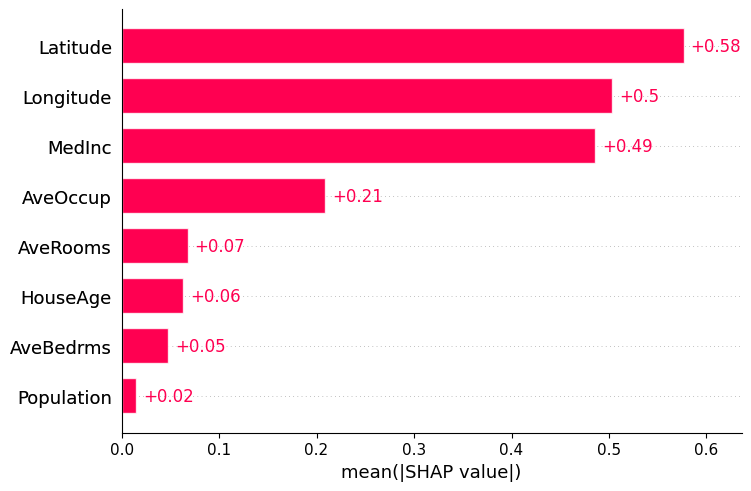

In [16]:
shap.plots.bar(shap_values)

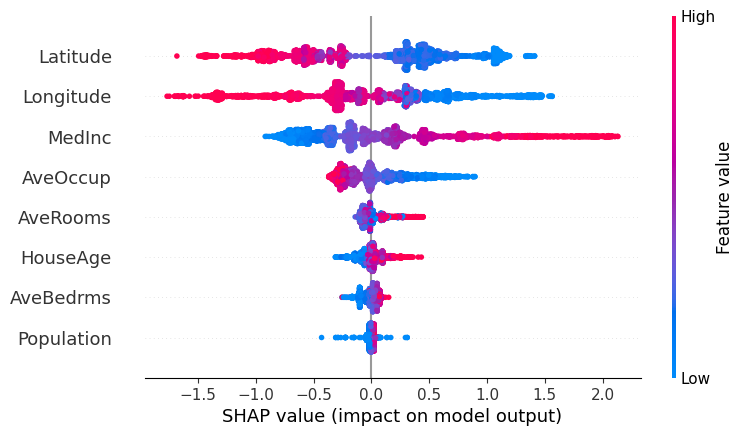

In [17]:
shap.plots.beeswarm(shap_values)

In [18]:
# !pip install opencv-python
import requests
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

2023-12-01 08:14:11.617125: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 08:14:12.055204: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 08:14:12.055276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 08:14:12.131427: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 08:14:12.301725: I tensorflow/core/platform/cpu_feature_guar

In [19]:
# Loading the class names from ImageNet 1000
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
class_names = requests.get(url).json().values()
class_names = [value[1] for value in class_names]

In [20]:
# Load the pre-trained model and some sample data
model_deep = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()
X = X.astype(int)

2023-12-01 08:14:35.586092: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 08:14:35.765078: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 08:14:35.765153: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 08:14:35.773228: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 08:14:35.773283: I external/local_xla/xla/stream_executor

102967424/102967424 [==============================] - 9s 0us/step


In [21]:
# Function to preprocess the data and get the model output
# We will use this as input for the SHAP explainer
def model(X):
    X_copy = X.copy()
    preprocess_input(X_copy)
    return model_deep(X_copy)

# A masker that will mask out partitions of the input image
masker = shap.maskers.Image("blur(128,128)", X[0].shape)

# Finally create the explainer
explainer = shap.Explainer(model, masker, output_names=class_names)

# Explain some images using 500 evaluations of the model 
# to estimate the SHAP values
shap_values = explainer(X[1:5], max_evals=500, batch_size=50, 
                        outputs=shap.Explanation.argsort.flip[:4], 
                        silent=True)

2023-12-01 08:15:56.704239: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


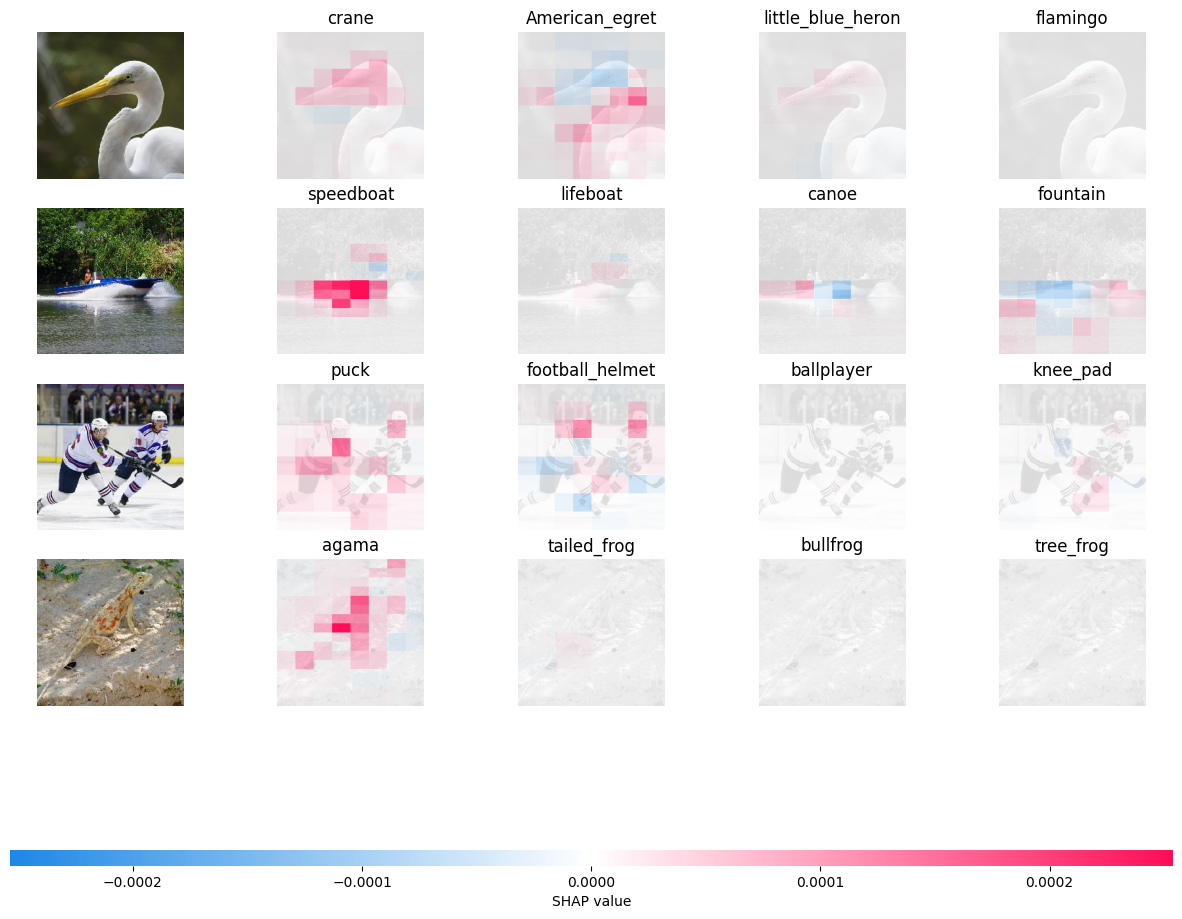

In [22]:
shap.image_plot(shap_values, pixel_values=X[1:5])

In [ ]:
y = w1x1 + w2x2 + w3x3 + w4x4 + b